<a href="https://colab.research.google.com/github/Jegsaran/Deep-learning/blob/main/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.models import Model

In [2]:
 f_mnist = tf.keras.datasets.fashion_mnist
 (x_train,y_train),(x_test,y_test) = f_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

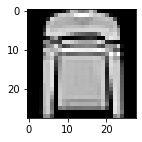

2


In [4]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[5],cmap='gray')
plt.show()

print(y_train[5])

In [5]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

In [6]:
#Normalizing the data to reduce the memory

x_train, x_test = x_train/255, x_test/255

In [7]:
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.34509804, 0.7372549 , 0.6745098 , 0.51764706, 0.49019608,
        0.55294118, 0.78039216, 0.56078431, 0.03529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.07843137, 0.51372549, 0.78039216, 0.80784314,
        0.76862745, 0.79215686, 0.94901961, 1.        , 1.        ,
        0.98039216, 0.87058824, 0.77254902, 0.80784314, 0.7372549 ,
        0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.1372549 , 0.83921569, 0.74901961, 0.71764706, 0.69803922,
        0.68627451, 0.65882353, 0.58823529, 0.63529412, 0.62352941,
        0.59607843, 0.6196

In case of ANN the data fed to the model would be in the size of Records x Length x width
But in case of CNN it should be in the size of records x length x width x channel

Since the dataset comprises of grayscale images channel = 1

In [8]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
# number of classes

K = len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [10]:
#Model Building

i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(i)
x = Conv2D(128,(3,3),strides=2,activation='relu')(i)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [11]:
#Model Compiling

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [12]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 269s 143ms/step - loss: 0.3898 - accuracy: 0.8587 - val_loss: 0.3193 - val_accuracy: 0.8812
Epoch 2/15
1875/1875 [==============================] - 256s 136ms/step - loss: 0.2646 - accuracy: 0.9013 - val_loss: 0.2991 - val_accuracy: 0.8932
Epoch 3/15
1875/1875 [==============================] - 251s 134ms/step - loss: 0.2139 - accuracy: 0.9194 - val_loss: 0.2729 - val_accuracy: 0.9017
Epoch 4/15
1875/1875 [==============================] - 248s 133ms/step - loss: 0.1779 - accuracy: 0.9335 - val_loss: 0.2774 - val_accuracy: 0.9039
Epoch 5/15
1875/1875 [==============================] - 251s 134ms/step - loss: 0.1435 - accuracy: 0.9454 - val_loss: 0.2946 - val_accuracy: 0.9093
Epoch 6/15
1875/1875 [==============================] - 248s 132ms/step - loss: 0.1201 - accuracy: 0.9547 - val_loss: 0.3010 - val_accuracy: 0.9081
Epoch 7/15
1875/1875 [==============================] - 248s 132ms/step - loss: 0.1005 - accuracy: 0.9625 - val_

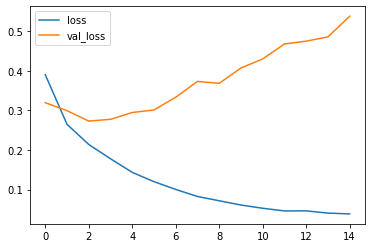

In [13]:
#Plotting loss per iteration

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

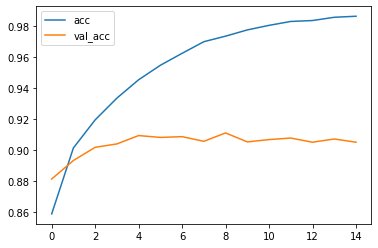

In [14]:
# Plotting accuracy per iteration

plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()
plt.show()

**Observation**

As per the graph the val_loss is going upwards and the val_accuracy is steady and not at all increasing. This shows us that the model is slightly overfitting.

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 14s 45ms/step - loss: 0.5373 - accuracy: 0.9050


[0.5373333692550659, 0.9049999713897705]

In [15]:
p_test = model.predict(x_test).argmax(axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,p_test)
cm

array([[839,   2,  17,  17,   4,   2, 117,   0,   2,   0],
       [  1, 981,   0,  15,   2,   0,   0,   0,   1,   0],
       [ 17,   2, 841,   6,  64,   0,  69,   0,   1,   0],
       [ 14,   5,  11, 916,  26,   0,  25,   0,   3,   0],
       [  1,   1,  77,  28, 824,   1,  67,   0,   1,   0],
       [  0,   0,   0,   0,   0, 989,   0,   9,   0,   2],
       [ 97,   2,  49,  23,  52,   0, 765,   0,  12,   0],
       [  0,   0,   0,   0,   0,  11,   0, 973,   1,  15],
       [  2,   2,   2,   4,   1,   3,  11,   1, 974,   0],
       [  0,   0,   0,   0,   0,  12,   2,  37,   1, 948]])

In [16]:
# Label mapping

labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

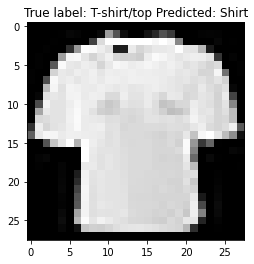

In [17]:
# Lets see some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))
plt.show()

**Inference**

The overall model accuracy is staying good @ ~90.5%

However based on the evaluation using Confusion Matrix we can see that the major 4 misclassified samples are

(T-shirt/top, Shirt), (Coat, Pullover), (Pullover, Shirt), (Coat, Shirt)